In this project, we use **Sales Product Data**, which contains 12 csv files, corresponding to sales data of 12 months in 2019. It includes these following data fields: <br>
**Order ID**: An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status. <br>
**Product**: The product that have been sold.<br>
**Quantity Ordered**: Ordered Quantity is the total item quantity ordered in the initial order (without any changes). <br>
**Price Each**: The price of each products.<br>
**Order Date**: This is the date the customer is requesting the order be shipped.<br>
**Purchase Address**: The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.<br>
 <br>
By using this data, we can generate insights about sales, find market oppotunities and build business strategies. As data analysts, we use this data to answer these questions: <br>

**Question 1**: What was the best month for sales? How much was earned that month? <br>
**Question 2**: What City had the highest number of sales? <br>
**Question 3**: What products sold the most? <br>
**Question 4**: What time should we display adverstisement to maximize likelihood of customer's buying product? <br>
**Question 5**: What products are most often sold together? <br>



**Step 1: Preparing data**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime as dt

In [23]:
#concat data from 12 files to a dataframe
path = "E:/data/project/sale_report_2019/"
dfs= []
for file in os.listdir(path):
    filepath= path + file
    df = pd.read_csv(filepath)
    dfs.append(df)
sale2019 = pd.concat(dfs)
sale2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [24]:
sale2019.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [25]:
sale2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


After checking of this dataframe quickly, we recognize 3 problems with this data: <br>
**Problem 1.** Most common value of "Order ID" column is "Order ID" (355 rows). This is similar to "Order Date" column and "Purchase Address" <br>
**Problem 2.** The dataframe has 186850 entries, however, all of columns have only 186305 non-null values. <br>
**Problem 3.** Data type of all columns is object. Data type of "Quantity Ordered", "Price Each" shoulđ be numeric and this one of "Order Date" is datetime. <br>
We need to resolve these problems before analyzing. <br>

**Problem 1.** <br>
To resolve this problem, firstly, we need to check the rows which have value "Order ID" in "OrderID" column and remaining rows. 

In [26]:
sale2019[sale2019['Order ID'] !='Order ID'].describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


In [27]:
sale2019[sale2019['Order ID']== 'Order ID'].describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,355,355,355,355,355,355
unique,1,1,1,1,1,1
top,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
freq,355,355,355,355,355,355


With all of rows which have "Order ID" in "Order ID" column, its values of all fields are the name of fields. The reason of this problem is probably that the heading rows hadn't been excluded when merging tables. Therefore, now, we need to drop these rows (355 rows).

**Problem 2.** NA values <br>
All of columns have the same quantity of not-null values. We try to use 'dropna' method and check dataframe after droping.

In [29]:
sale2019= sale2019[sale2019['Order ID'] != 'Order ID']
sale2019.dropna(inplace= True)
sale2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


The number of remaining rows is 185950, this equals to subtract 355 (number of heading rows) from 186.305 (number of not-null rows). This confirms that problem 1 and problem 2 have been resolved.

**Problem 3.** Data types

In [30]:
sale2019[['Order ID', 'Quantity Ordered', 'Price Each']]= sale2019[['Order ID', 'Quantity Ordered', 'Price Each']].apply(pd.to_numeric)
sale2019['Order Date'] = pd.to_datetime(sale2019['Order Date'], format ='%m/%d/%y %H:%M')
sale2019[['Product', 'Purchase Address']]= sale2019[['Product', 'Purchase Address']].astype('string')
print(sale2019.dtypes)
print(sale2019.isnull().sum())

Order ID                     int64
Product                     string
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            string
dtype: object
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


All fields have been converted to relevant data types. Then, we should get city, state from Address and year, month, day, hour from Order Date. 

In [31]:
sale2019['Year']=sale2019['Order Date'].dt.year
sale2019['Month'] = sale2019['Order Date'].dt.month
sale2019['Day_of_month'] = sale2019['Order Date'].dt.day
sale2019['Hour'] = sale2019['Order Date'].dt.hour
sale2019['City'] = list(map(lambda address: address.split(',')[1], sale2019['Purchase Address']))
sale2019['State'] = list(map(lambda address: address.split(',')[2].split(' ')[1], sale2019['Purchase Address']))
sale2019['Sales'] = sale2019['Quantity Ordered'] * sale2019['Price Each']
print(sale2019.describe())

            Order ID  Quantity Ordered     Price Each           Year  \
count  185950.000000     185950.000000  185950.000000  185950.000000   
mean   230417.569379          1.124383     184.399735    2019.000183   
std     51512.737110          0.442793     332.731330       0.013521   
min    141234.000000          1.000000       2.990000    2019.000000   
25%    185831.250000          1.000000      11.950000    2019.000000   
50%    230367.500000          1.000000      14.950000    2019.000000   
75%    275035.750000          1.000000     150.000000    2019.000000   
max    319670.000000          9.000000    1700.000000    2020.000000   

               Month   Day_of_month           Hour          Sales  
count  185950.000000  185950.000000  185950.000000  185950.000000  
mean        7.059140      15.759532      14.413305     185.490917  
std         3.502996       8.782176       5.423416     332.919771  
min         1.000000       1.000000       0.000000       2.990000  
25%        

In [32]:
sale2019.max()

Order ID                                            319670
Product                                             iPhone
Quantity Ordered                                         9
Price Each                                          1700.0
Order Date                             2020-01-01 05:13:00
Purchase Address    999 Wilson St, San Francisco, CA 94016
Year                                                  2020
Month                                                   12
Day_of_month                                            31
Hour                                                    23
City                                               Seattle
State                                                   WA
Sales                                               3400.0
dtype: object

We notice that the maximum value of Order Date is 2020-01-01 05:13:00. That means there are few orders made in 2020-01-01. We should be careful when creating monthly analysis. <br>
Now, data has already been prepared, so we can start to answering business questions.

**Question 1**: What was the best month for sales? How much was earned that month?

In [33]:
sales_months = sale2019[sale2019['Year']==2019].groupby('Month').sum()['Sales']
sales_months


Month
1     1813586.44
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [34]:
m= sales_months.max()
for month, sales in sales_months.items():
    if sales == m:
        print('Month:' + str(month))
        print('Sales:' + str(sales))

Month:12
Sales:4613443.34


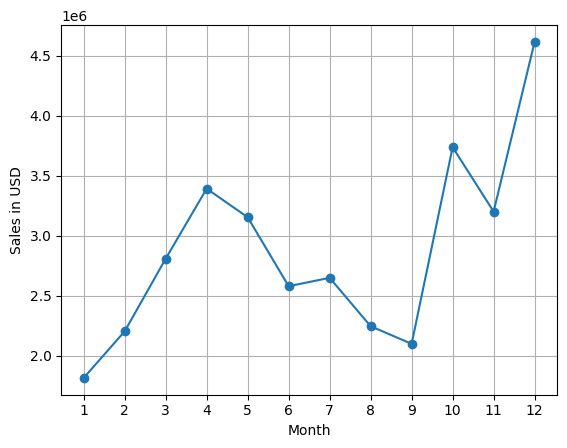

In [35]:
months= range(1, 13)
plt.plot(months, sales_months, marker = 'o')
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.grid()
plt.show()

The best month for sales was December with above 4.6 million USD. The reason might be that this was the last month of year, and people bought as a gift for Christmas or year end party. <br>
In additional, sales in April was increased compared to March. Therefore, if the company is planning to organize some advertising campaigns, it should be holded at the end of November and the end of March.

**Question 2**: What City had the highest number of sales?

In [36]:
sales_cities = sale2019.groupby('City').sum()['Sales']
sales_cities

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

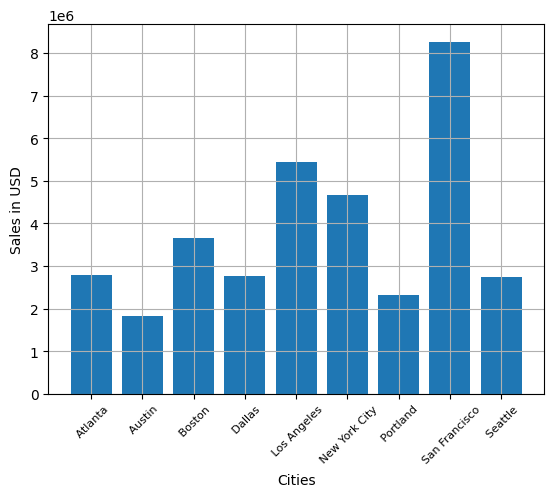

In [37]:
cities = [city for city, sales in sales_cities.items()]
plt.grid()
plt.bar(cities, sales_cities)
plt.xticks(cities, rotation = 45, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

San Francisco had the highest number of sales, which is much higher than other cities. We can consider to apply promotions to San Francisco. If possible, we should gather more data about customers' feedback, demographic characteristics to understand exactly why San Francisco had higher of sale than others, then find strategy to increase sales in other cities.

**Question 3**: What products sold the most?

In [38]:
sales_products= sale2019.groupby('Product').sum()['Sales']
counts_products = sale2019.groupby('Product').sum()['Quantity Ordered']
print('Top 3 highest turnover:')
print(sales_products.sort_values(ascending=False).head(3))
print('-----')
print('Top 3 product sold the most')
print(counts_products.sort_values(ascending=False).head(3))

Top 3 highest turnover:
Product
Macbook Pro Laptop    8037600.0
iPhone                4794300.0
ThinkPad Laptop       4129958.7
Name: Sales, dtype: float64
-----
Top 3 product sold the most
Product
AAA Batteries (4-pack)    31017
AA Batteries (4-pack)     27635
USB-C Charging Cable      23975
Name: Quantity Ordered, dtype: int64


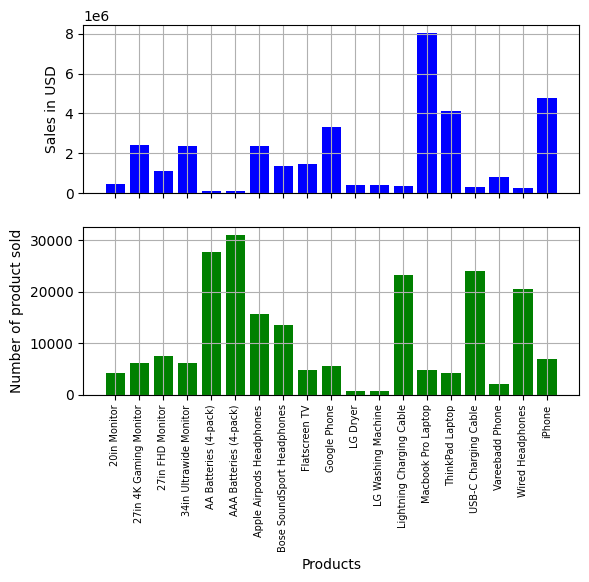

In [45]:
products = [product for product, total in sales_products.items()]
fig, ax = plt.subplots(nrows=2,ncols=1, sharex= True)
ax[0].bar(products, sales_products, color='b')
ax[0].set_ylabel('Sales in USD')
ax[1].bar(products, counts_products, color ='g')
ax[1].set_ylabel('Number of product sold')
plt.xticks(products, rotation=90, size =7)
plt.xlabel('Products')
ax[0].grid()
ax[1].grid()
plt.show()

In the term of quantity, AAA Batteries sold the most, and the second was AA Batteries, because batteries were drained quickly and they need to replace within one or two months while other products (such as monitor, phone, washing machine, laptop, etc) can be used for several years. Another reason is the low price of them. Therefore, the company needs to stock a large number of these products to meet market demand. <br>
In the term of sales, because of the high price, Macbook Pro Laptop, iPhone, ThinkPad Laptop brought the highest sales.

**Question 4**: What time should we display adverstisement to maximize likelihood of customer's buying product?

To find the appropriate time to display advertisement, we should discover which hours customers ordered the highest number of products. We can try to plot hourly sales on the same chart to understand the relationship and the difference between sales and quantity of products.

In [40]:
sales_hours = sale2019.groupby('Hour').sum()['Sales']
quantity_hours = sale2019.groupby('Hour').sum()['Quantity Ordered']
hours= range(0,24)
print(sales_hours.head(3))
print(quantity_hours.head(3))

Hour
0    713721.27
1    460866.88
2    234851.44
Name: Sales, dtype: float64
Hour
0    4428
1    2619
2    1398
Name: Quantity Ordered, dtype: int64


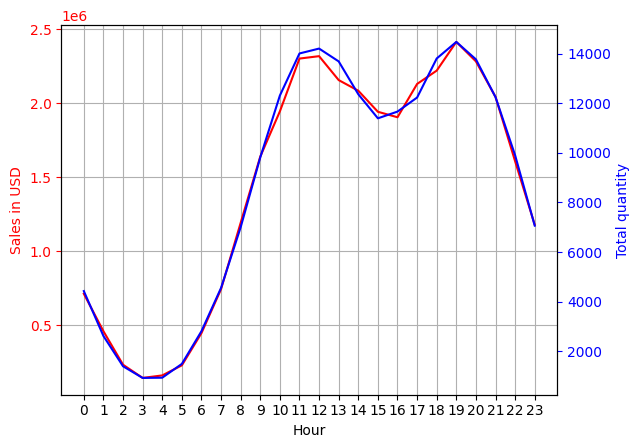

In [41]:
fig, ax = plt.subplots()
ax.plot(hours, sales_hours, color = 'r')
ax.tick_params('y', color ='r', labelcolor='r')
ax.set_ylabel('Sales in USD', color ='r')
ax.set_xlabel('Hour')
ax2 = ax.twinx()
ax2.plot(hours, quantity_hours, color='b', linestyle='-')
ax2.tick_params('y', color='b', labelcolor='b')
ax2.set_ylabel('Total quantity', color='b')
plt.xticks(hours)
ax.grid()
plt.show()

Two lines are similar. Customers often ordered at 11AM- 1PM and 6PM-8PM, when the end of work time. This result suggest that we should display advertisement at 10:30AM - 12PM and/or 5h30PM - 7PM. <br>
To optimize the time of advertisement, we should analyze for each city. 

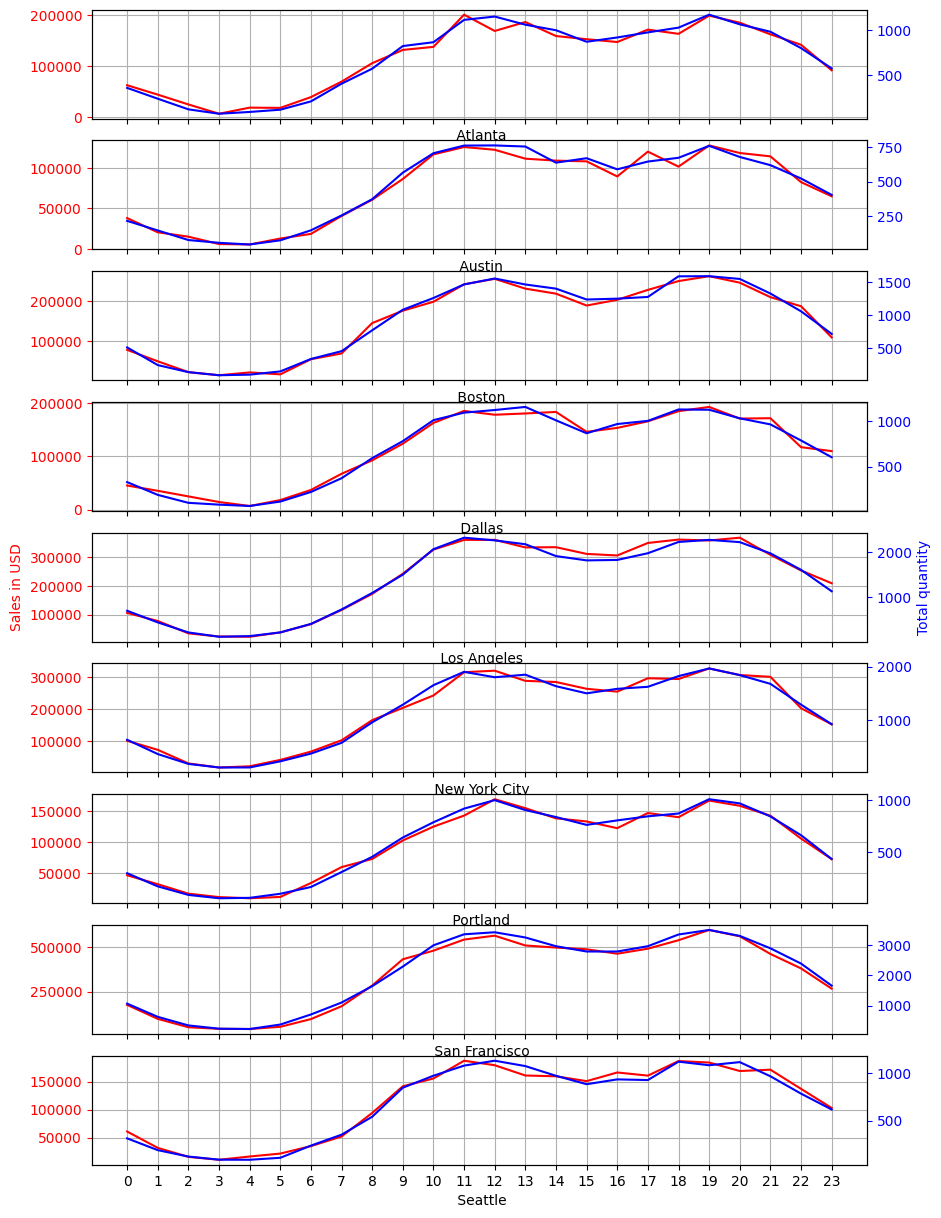

In [63]:
fig, ax = plt.subplots(nrows=len(cities),ncols=1, sharex= True, figsize=(10,15))
for i in range(0, len(cities)): 
    df=sale2019[sale2019['City']==cities[i]]
    sales_hours_city = df.groupby('Hour').sum()['Sales']
    quantity_hours_city = df.groupby('Hour').sum()['Quantity Ordered']
    ax2=ax[i].twinx()
    ax[i].plot(hours, sales_hours_city, color = 'r')
    ax[i].tick_params('y', color ='r', labelcolor='r')
    ax[i].set_xlabel(cities[i])
    ax2.plot(hours, quantity_hours_city, color='b', linestyle='-')
    ax2.tick_params('y', color='b', labelcolor='b')
    if i == int(len(cities)/2): 
        ax2.set_ylabel('Total quantity', color='b')
        ax[i].set_ylabel('Sales in USD', color ='r')
    ax[i].grid()
plt.xticks(hours, size =7)
plt.xlabel('Hours')
plt.show()

The time customers ordered the most in all cities was similar, so we can apply the advertising time we have discussed above.

**Question 5**: What products are most often sold together? <br>
Two (or more) products ordered together with the same order ID are called "sold together". To solve this questions, we follow these steps: <br>
 - Firstly, we get list of products. Then, we use a "for" loop to get list of order IDs which contain each product (assign to a dictionary called "list_order"). <br>
 - Secondly, to know how many orders a pair of products was ordered together, we count number of order IDs which were included in both list_order and assign to a dictionary called "pairs". <br>
 - Finally, we convert "pairs" dictionary to series in order to sort by values and get top 10 most common pairs. <br>

In [75]:
products= sale2019['Product'].unique()
list_order={}
pairs={}
for product in products:
    list_order[product]=set(sale2019[sale2019['Product']== product]['Order ID'].unique())
for i in range(0, len(products) -1):
    for j in range(i+1, len(products)):
        pairs[(products[i], products[j])] = len(list_order[products[i]] & list_order[products[j]])
pairs_series=pd.Series(pairs)
pairs_series.sort_values(ascending=False).head(10)

iPhone                      Lightning Charging Cable    1011
USB-C Charging Cable        Google Phone                 997
iPhone                      Wired Headphones             462
Wired Headphones            Google Phone                 422
iPhone                      Apple Airpods Headphones     373
USB-C Charging Cable        Vareebadd Phone              368
Bose SoundSport Headphones  Google Phone                 228
Wired Headphones            USB-C Charging Cable         203
                            Vareebadd Phone              149
Lightning Charging Cable    Wired Headphones             129
dtype: int64

The most common pairs is a phone and headphones or charging cable, which is used with the phone. Therefore, we can apply discount for headphones and/or charging cable when buying a phone. In fact, this policy have been applied at many electronics stores.

After analyzing and finding insights, we have several comments on this data: <br>
**Strengths** <br>
- Data contains about 200,000 rows. It is a large data so we can understand clearly, completely about sales situation in 2019. <br>
- Data colected automatically didn't contain duplicated rows and it was consistent. Therefore, we don't need to spend much time to clean before analyzing. <br>
**Limitations** <br>
To understand comprehensively about sales situation, we need some information which wasn't contained by this data: <br>
- Customer feedback: after receiving goods, customers often give feedback to products and service. Analyzing feedback, we will know how good we served, which problems we need to improve or why customers in this city ordered a lot while customers in another city didn't. <br>
- Information of customer: we need one or more data fields to identify customers (such as customer ID, phone number) to understand individual buying behavior and then opitimize our policy, advertisement and promotions. <br>
- Employees who received, processed, shipped and supported orders: Because of the lack of these information, we couldn't track the perfomance of teams in our company. <br>
